# Exploring lengts

In [1]:
import importlib
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0] / "network_models/soundstream_lstm")
if module_path not in sys.path:
    sys.path.append(module_path)

import network_models.soundstream_lstm.CombinedEmoDataset_7_Emo as ced
importlib.reload(ced)


directory_tess="/home/ckwdani/Music/emotionDatasets/converted_mono/tess"
directory_cafe="/home/ckwdani/Music/emotionDatasets/converted_mono/cafe"
directory_ravdess="/home/ckwdani/Music/emotionDatasets/converted_mono/RAVDESS Audio_Speech_Actors_01-24"
directory_mesd="/home/ckwdani/Music/emotionDatasets/converted_mono/mesd"

#collator = ced.collateToSeconds(3.5, 16000, 0, True)

collator = lambda x: x

tess = ced.DatasetGeneric(directory=directory_tess, device="cpu", load_dataset=ced.loadTess, transFormAudio=collator)
cafe = ced.DatasetGeneric(directory=directory_cafe, device="cpu", load_dataset=ced.loadCafe, transFormAudio=collator)
ravdess = ced.DatasetGeneric(directory=directory_ravdess, device="cpu", load_dataset=ced.loadRavdess, transFormAudio=collator)
mesd = ced.DatasetGeneric(directory=directory_mesd, device="cpu", load_dataset=ced.loadMesd, transFormAudio=collator)


def getMinMaxAvg(ds: ced.DatasetGeneric):
    mini, maxi, avg = float("inf"), 0, 0
    max_index = -1
    for i in range(len(ds)):
        lenSec = len(ds[i][0][0])/16000
        mini = min(mini, lenSec)
        maxi = max(maxi, lenSec)
        if maxi == lenSec:
            max_index = i
        avg = ((i * avg) + lenSec)/(i+1)
    return mini, maxi, avg, max_index


def getMinMaxFromValues(ds: ced.DatasetGeneric):
    mini, maxi = float("inf"), 0
    print(len(ds[0][0][0]))
    for i in range(len(ds[0][0][0])):
        if(i % 1000 == 0):
            print(i)
        val = ds[0][0][0][i]
        mini = min(mini, val)
        maxi = max(maxi, val)
    return mini, maxi

In [2]:

tessVals = getMinMaxAvg(tess)
cafeVals = getMinMaxAvg(cafe)
ravdessVals = getMinMaxAvg(ravdess)
mesdVals = getMinMaxAvg(mesd)

print(f"tess min: {tessVals[0]}, max: {tessVals[1]}, avg: {tessVals[2]}" )
print(f"cafe min: {cafeVals[0]}, max: {cafeVals[1]}, avg: {cafeVals[2]}" )
print(f"ravdess min: {ravdessVals[0]}, max: {ravdessVals[1]}, avg: {ravdessVals[2]}" )
print(f"mesd min: {mesdVals[0]}, max: {mesdVals[1]}, avg: {mesdVals[2]}" )

tess min: 1.2540625, max: 2.9848125, avg: 2.0551157366071355
cafe min: 2.556875, max: 7.744875, avg: 4.4417601495726595
ravdess min: 2.969625, max: 5.2719375, avg: 3.6860485276442287
mesd min: 0.1990625, max: 2.5371875, avg: 0.6946825543478258


In [3]:
len(mesd)

1150

<AxesSubplot: xlabel='emotion', ylabel='count'>

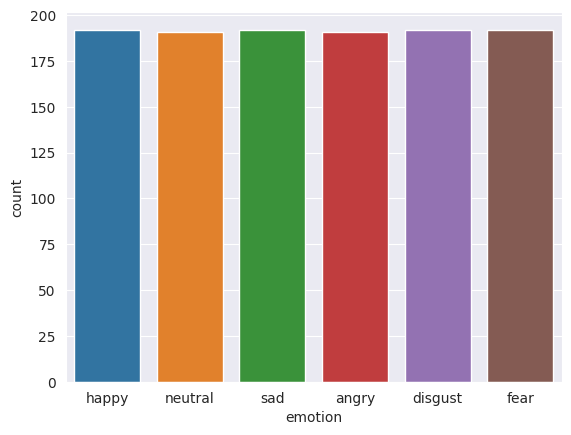

In [4]:
import seaborn as sns
sns.countplot(x ='emotion', data = mesd.dataFrame)

In [4]:
import torchaudio
from IPython.lib.display import Audio
print(cafe.getDir(cafeVals[3])[0])
audio, sr = torchaudio.load(cafe.getDir(cafeVals[3])[0])
print(audio.shape)
Audio(audio, rate=sr)

/home/ckwdani/Music/emotionDatasets/converted_mono/cafe/Dégoût/Faible/12-D-1-5.flac
torch.Size([1, 123918])


In [16]:
from IPython.lib.display import Audio
#print(cafe[cafeVals[3]][0][0])
Audio(cafe[cafeVals[3]][0][0].numpy(), rate=16000)

In [2]:
tessVals = getMinMaxFromValues(tess)
#cafeVals = getMinMaxFromValues(cafe)
#ravdessVals = getMinMaxFromValues(ravdess)
#mesdVals = getMinMaxFromValues(mesd)

print(f"tess min: {tessVals[0]}, max: {tessVals[1]}" )
# print(f"cafe min: {cafeVals[0]}, max: {cafeVals[1]}" )
# print(f"ravdess min: {ravdessVals[0]}, max: {ravdessVals[1]}" )
# print(f"mesd min: {mesdVals[0]}, max: {mesdVals[1]}" )

56000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
tess min: -0.15655517578125, max: 0.133209228515625
